# Computational Simulation of Equivalence Class Formation Using the go/no-go Procedure with Compound Stimuli

### Abstract
Research about equivalence has commonly utilized human participants as experimental subjects. More recently, computational models have been capable of reproducing performances observed in experiments with humans. The computational model often utilized is called RELNET, and it simulates training and testing trials of conditional relations using the matching-to-sample procedure (MTS). The differentiation between sample stimulus and comparison stimuli, indispensable in MTS, implies operational difficulties for simulations. For this reason, new studies seek to utilize alternative procedures to MTS, which do not differentiate the functions of the antecedent stimuli. This work evaluated the possibility of developing a new computational model to simulate equivalence class formation using the go/no-go procedure with compound stimuli. In Experiment 1, artificial neural networks were utilized to simulate training of the AB and BC relations as well as the testing of the AC relation. The results showed that four out of six runs demonstrated equivalence class formation. Experiment 2 evaluated whether the additional class training performed in Experiment 1, which was analogous to the simulation of pre-experimental experience of human participants, would be essential for simulating the establishment of equivalence classes. It was found that it was not possible to simulate equivalence class formation without the additional class training. Altogether, the experiments show that it is possible to simulate equivalence class formation using the go/no-go procedure with compound stimuli and that it is necessary to conduct additional class training. The model developed is, therefore, an alternative to RELNET for the study of equivalence relations using computational simulations.

[article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4960284/pdf/40732_2016_Article_184.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

%matplotlib inline
plt.style.use('seaborn')

In [2]:
train_1_y=[1,1,1,1,0,1,0,1,0,1,0] 
test_1_y=[1,0,1,0]
train_2_y=[1,0,1,0,1,0,1,0]
test_2_y=[1,0,1,0]

In [3]:
def mean_sq_err(predict,real):
    return (np.mean((predict-real)**2))

In [4]:
dat=pd.read_csv("Results_1/TF_replicas.csv", 
                header=None, 
                names=(["exp_1_n_epocs",
                        "XY_1",
                        "YZ_1",
                        "XZ_1",
                        "A1B1_1",
                        "A1B2_1",
                        "B1C1_1",
                        "B1C2_1",
                        "A2B2_1",
                        "A2B1_1",
                        "B2C2_1",
                        "B2C1_1",
                        "A1C1_1",
                        "A1C2_1",
                        "A2C2_1",
                        "A2C1_1",
                        "exp_2_final_loss",
                        "exp_2_n_epocs",
                        "A1B1_2",
                        "A1B2_2",
                        "B1C1_2",
                        "B1C2_2",
                        "A2B2_2",
                        "A2B1_2",
                        "B2C2_2",
                        "B2C1_2",
                        "A1C1_2",
                        "A1C2_2",
                        "A2C2_2",
                        "A2C1_2",
                       ]))# , sep=";" # para bases en español #_hid_4_1
#dat=pd.read_csv("Results_1/test_hid_4_1.csv")# , sep=";" # para bases en español #_hid_4_1
print(len(dat))
print(list(dat.columns))

1037
['exp_1_n_epocs', 'XY_1', 'YZ_1', 'XZ_1', 'A1B1_1', 'A1B2_1', 'B1C1_1', 'B1C2_1', 'A2B2_1', 'A2B1_1', 'B2C2_1', 'B2C1_1', 'A1C1_1', 'A1C2_1', 'A2C2_1', 'A2C1_1', 'exp_2_final_loss', 'exp_2_n_epocs', 'A1B1_2', 'A1B2_2', 'B1C1_2', 'B1C2_2', 'A2B2_2', 'A2B1_2', 'B2C2_2', 'B2C1_2', 'A1C1_2', 'A1C2_2', 'A2C2_2', 'A2C1_2']


count     1037.000000
mean      5395.236258
std       1142.180644
min       3311.000000
25%       4751.000000
50%       5166.000000
75%       5677.000000
max      20000.000000
Name: exp_1_n_epocs, dtype: float64

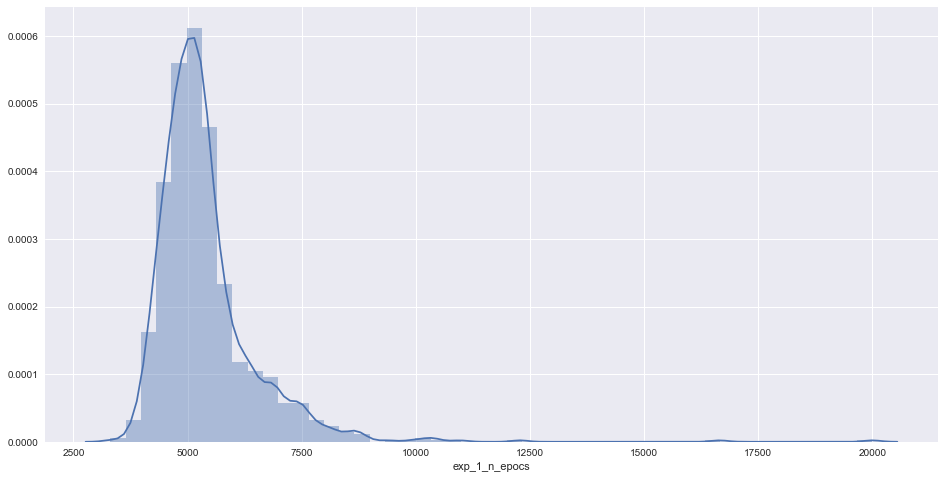

In [5]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(dat["exp_1_n_epocs"])
dat["exp_1_n_epocs"].describe()

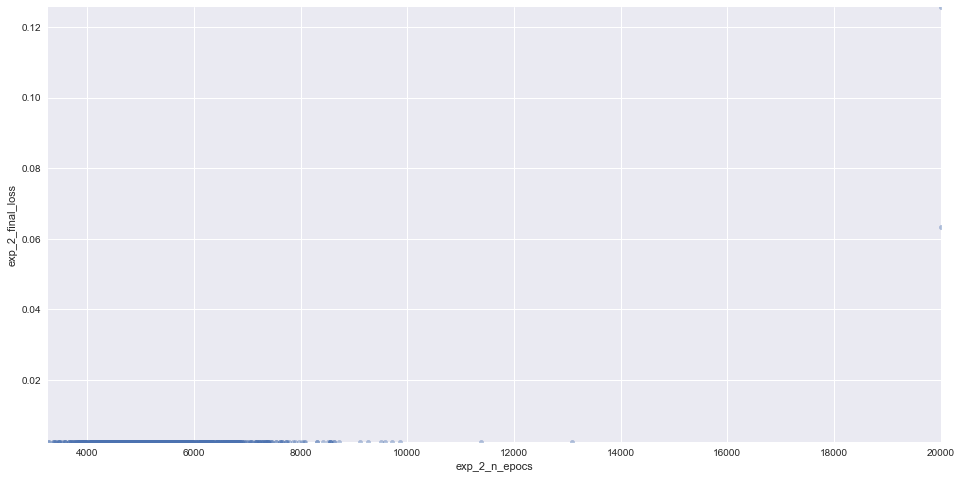

In [6]:
dat.plot.scatter(
    x='exp_2_n_epocs',
    y='exp_2_final_loss',
    ylim=(dat["exp_2_final_loss"].min(),dat["exp_2_final_loss"].max()),
    xlim=(dat["exp_2_n_epocs"].min(),dat["exp_2_n_epocs"].max()),
    figsize=(16,8),
    alpha=0.4
)

In [7]:
dat["exp_2_final_loss"].describe()

count    1037.000000
mean        0.002677
std         0.004264
min         0.002499
25%         0.002499
50%         0.002500
75%         0.002500
max         0.125685
Name: exp_2_final_loss, dtype: float64

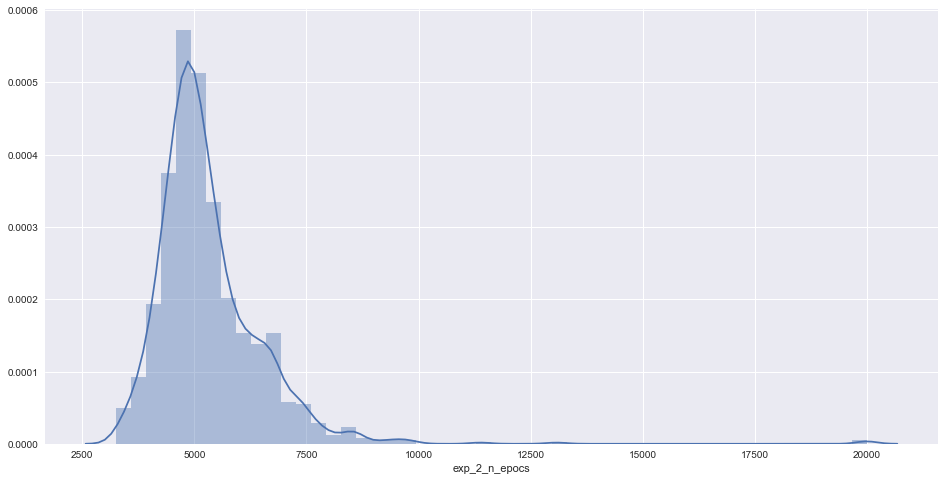

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(dat["exp_2_n_epocs"])

In [9]:
dat.iloc[:,1:12].describe()

,XY_1,YZ_1,XZ_1,A1B1_1,A1B2_1,B1C1_1,B1C2_1,A2B2_1,A2B1_1,B2C2_1,B2C1_1
count,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000
mean,0.994290,0.994325,0.994346,0.942948,0.056845,0.942657,0.056989,0.942445,0.057736,0.942197,0.056949
std,0.005686,0.005732,0.005613,0.014569,0.012435,0.014500,0.012303,0.011472,0.022927,0.011395,0.012373
min,0.954656,0.963098,0.960281,0.665261,0.020818,0.665476,0.016614,0.899097,0.021713,0.901392,0.019297
25%,0.991847,0.992022,0.991934,0.935832,0.049159,0.936057,0.050397,0.935972,0.049393,0.935483,0.049450
50%,0.996098,0.996027,0.996156,0.941972,0.056920,0.941941,0.057765,0.941988,0.057239,0.941391,0.057122
75%,0.998497,0.998489,0.998459,0.948518,0.064624,0.948242,0.064577,0.948709,0.064684,0.947782,0.064516
max,0.999951,0.999949,0.999956,0.981005,0.097960,0.983363,0.094691,0.981105,0.670206,0.981170,0.103744


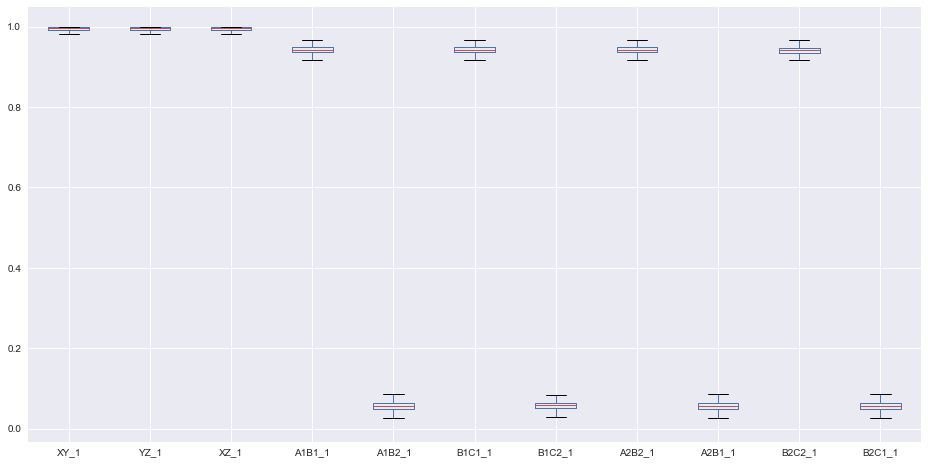

In [10]:
dat.iloc[:,1:12].plot(kind="box", figsize=(16,8))#, alpha=0.6)

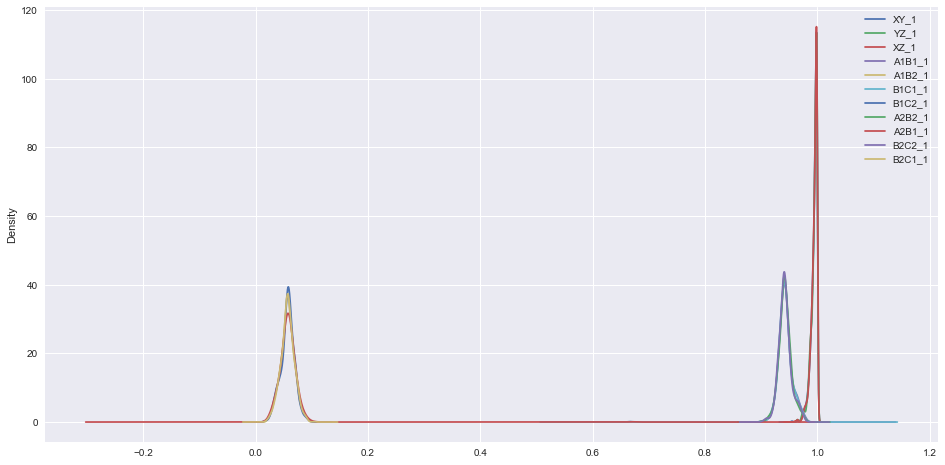

In [11]:
dat.iloc[:,1:12].plot(kind="density", figsize=(16,8))#, alpha=0.6)

In [12]:
dat.iloc[:,12:16].describe()

,A1C1_1,A1C2_1,A2C2_1,A2C1_1
count,1037.000000,1037.000000,1037.000000,1037.000000
mean,0.725614,0.363035,0.726695,0.364249
std,0.297411,0.302110,0.301045,0.300705
min,0.015175,0.017632,0.009058,0.009571
25%,0.549489,0.111629,0.566214,0.116513
50%,0.886914,0.231120,0.893376,0.235344
75%,0.946845,0.602129,0.945530,0.609697
max,0.998250,0.990314,0.998706,0.990754


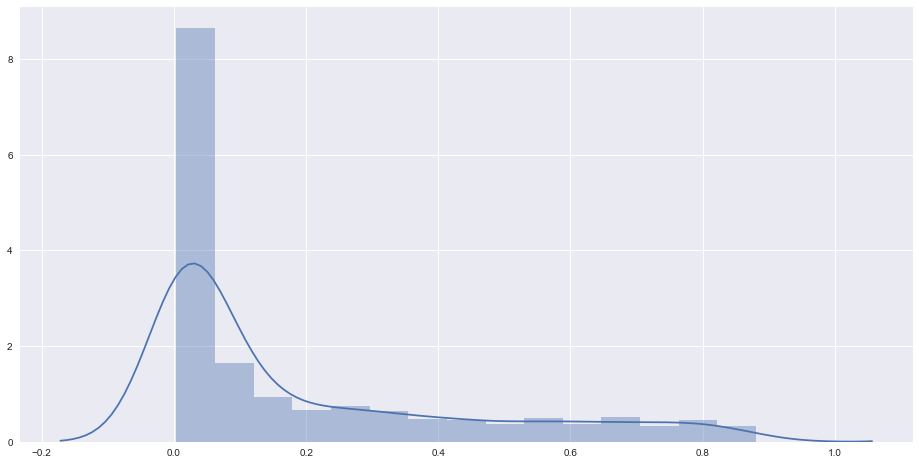

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(np.mean((dat.iloc[:,12:16]-test_1_y)**2, axis=1) )

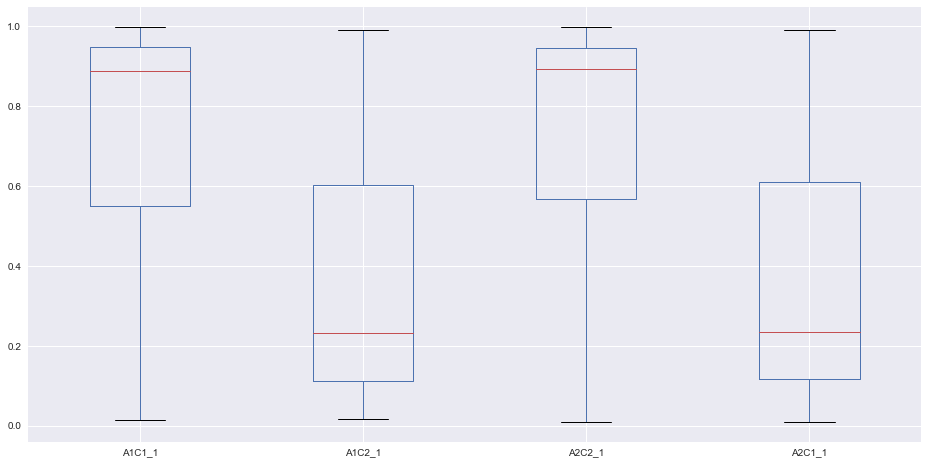

In [14]:
dat.iloc[:,12:16].plot(kind="box", figsize=(16,8))#, alpha=0.6)

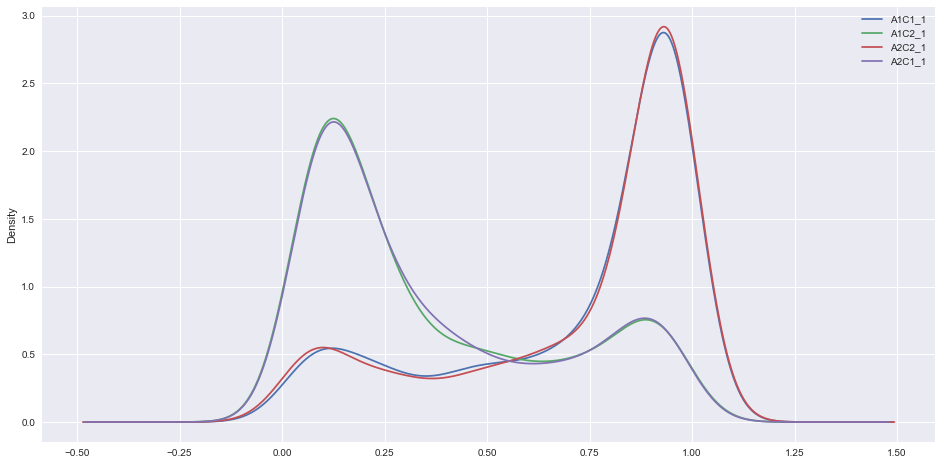

In [15]:
dat.iloc[:,12:16].plot.density(figsize=(16,8))

In [16]:
dat.iloc[:,18:26].describe()

,A1B1_2,A1B2_2,B1C1_2,B1C2_2,A2B2_2,A2B1_2,B2C2_2,B2C1_2
count,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000
mean,0.951516,0.049538,0.951378,0.049298,0.950774,0.048033,0.950612,0.049198
std,0.011584,0.022813,0.011593,0.011143,0.018050,0.011198,0.022847,0.018347
min,0.914467,0.002455,0.910443,0.013088,0.498868,0.011808,0.498214,0.013984
25%,0.944315,0.043005,0.944337,0.043698,0.944291,0.042446,0.944631,0.042637
50%,0.950396,0.049448,0.950035,0.049872,0.950343,0.049303,0.950468,0.049884
75%,0.957666,0.055252,0.957880,0.055935,0.956749,0.055210,0.956882,0.055295
max,0.982619,0.501282,0.983520,0.093870,0.987839,0.088324,0.982810,0.500736


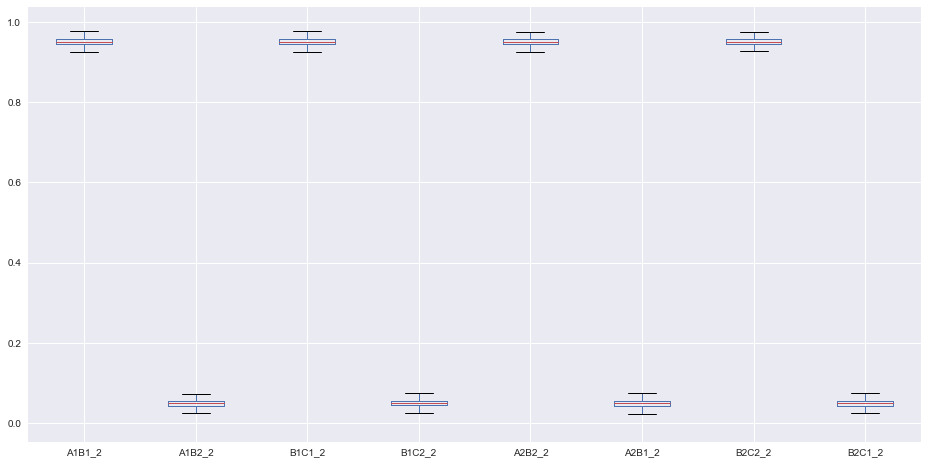

In [17]:
dat.iloc[:,18:26].plot(kind="box", figsize=(16,8))#, alpha=0.6)

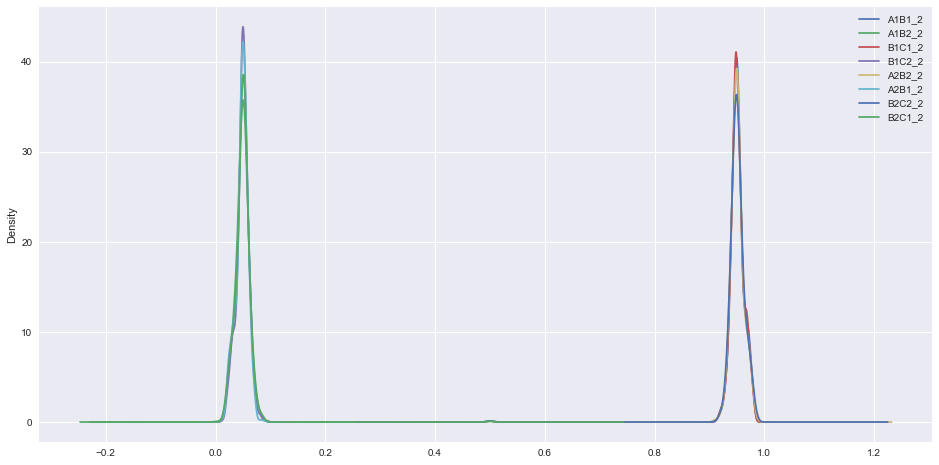

In [18]:
dat.iloc[:,18:26].plot(kind="density", figsize=(16,8))#, alpha=0.6)

In [19]:
dat.iloc[:,26:30].describe()

,A1C1_2,A1C2_2,A2C2_2,A2C1_2
count,1037.000000,1037.000000,1037.000000,1037.000000
mean,0.483794,0.510111,0.490759,0.494919
std,0.368716,0.347803,0.366476,0.350332
min,0.006500,0.018049,0.013481,0.012295
25%,0.086506,0.138062,0.091774,0.130490
50%,0.444131,0.543912,0.470719,0.478560
75%,0.892299,0.872617,0.889217,0.870284
max,0.990869,0.985554,0.993155,0.983411


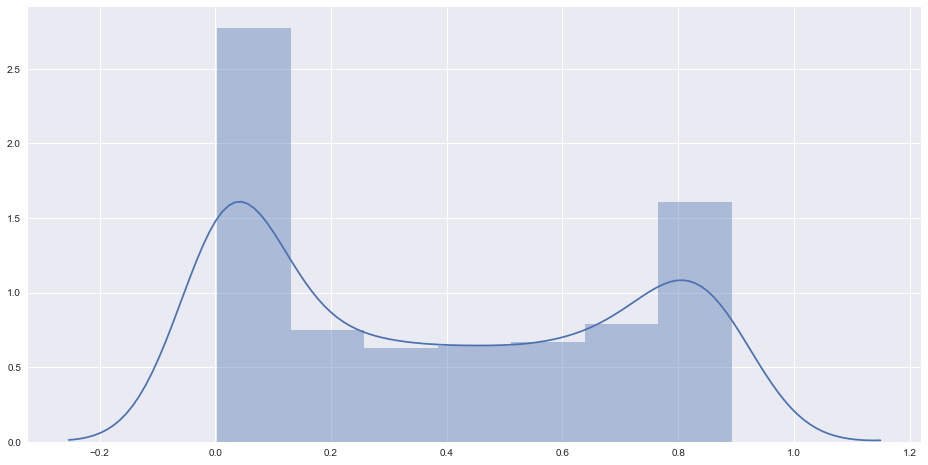

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(np.mean((dat.iloc[:,26:30]-test_1_y)**2, axis=1) )

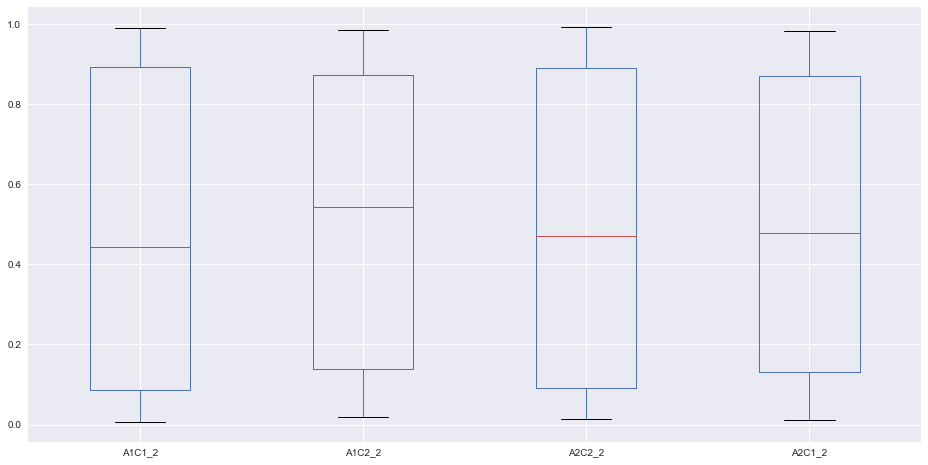

In [21]:
dat.iloc[:,26:30].plot(kind="box", figsize=(16,8))#, alpha=0.6)

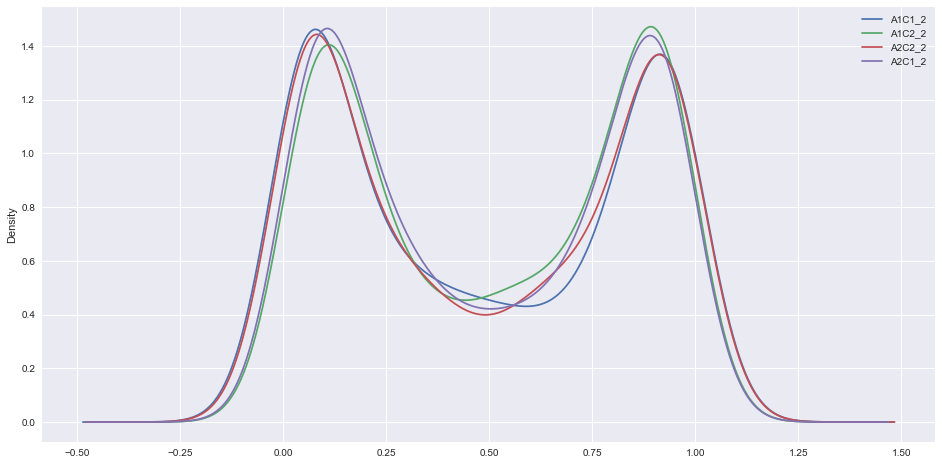

In [22]:
dat.iloc[:,26:30].plot(kind="density", figsize=(16,8))#, alpha=0.6)